# Exploring eBay Car Sales Data

The goal of this project is to practice data cleaning and analysis using Pandas, as well as becoming familiar with some of the unique benefits jupyter notebook provides for pandas.

We'll do that by analysing a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle by user [orgesleka](https://www.kaggle.com/orgesleka).
The original dataset isn't available on Kaggle anymore, but you can find it [here](https://data.world/data-society/used-cars-data).

Several modifications were made to the original dataset by the Dataquest team:
* 50,000 data points were sampled from the full dataset, to ensure the code runs quickly in the hosted environment
* The original version uploaded to Kaggle was clean to be easier to work with, so the Dataquest team dirtied the dataset a bit to more closely resemble what a real-world scraped dataset

The data dictionary provided with data is as follows:

* `dateCrawled         - When this ad was first crawled. All field-values are taken from this date.`
* `name                - Name of the car.`
* `seller              - Whether the seller is private or a dealer.`
* `offerType           - The type of listing`
* `price               - The price on the ad to sell the car.`
* `abtest              - Whether the listing is included in an A/B test.`
* `vehicleType         - The vehicle Type.`
* `yearOfRegistration  - The year in which the car was first registered.`
* `gearbox             - The transmission type.`
* `powerPS             - The power of the car in PS.`
* `model               - The car model name.`
* `odometer            - How many kilometers the car has driven.`
* `monthOfRegistration - The month in which the car was first registered.`
* `fuelType            - What type of fuel the car uses.`
* `brand               - The brand of the car.`
* `notRepairedDamage   - If the car has a damage which is not yet repaired.`
* `dateCreated         - The date on which the eBay listing was created.`
* `nrOfPictures        - The number of pictures in the ad.`
* `postalCode          - The postal code for the location of the vehicle.`
* `lastSeenOnline      - When the crawler saw this ad last online.`

Let's start with some boilerplate code to load the dataset:

In [2]:
import pandas as pd

autos = pd.read_csv('autos.csv', encoding="Latin-1")

In [3]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


## Data Cleaning

In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

We've created 'autos', a dataset composed of 50,000 data points. from info's output we can see several changes we'd like to make to the dataset to make it easier to work with:
* Reword some column names and convert all of them from CamelCase to snakecase
* Convert columns from object to int64 (price, odometer), boolean (notRepairedDamage) or datetime (dateCrawled, dateCreated, lastSeen) and from int64 to object (postalCode).
* Translate some columns to English, where reasonable (vehicleType, gearbox).
* Some columns have several thousands of null objects, and we'd like to investigate further what's the cause for the null objects and what we should do with them.

Let's start with the first bullet point - cleaning the column names:

In [5]:
columns = autos.columns
autos.rename(columns={
                      "yearOfRegistration": "registration_year",
                      "monthOfRegistration": "registration_month",
                      "notRepairedDamage": "unrepaired_damage",
                      "dateCreated": "ad_created",
                      "dateCrawled": "date_crawled",
                      "offerType": "offer_type",
                      "vehicleType": "vehicle_type",
                      "powerPS": "power_ps",
                      "fuelType": "fuel_type",
                      "vehicleType": "vehicle_type",
                      "nrOfPictures": "nr_of_pictures",
                      "postalCode": "postal_code",
                      "lastSeen": "last_seen",
                     }, inplace=True)

autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Let's see what we can learn about the dataset by describing it.

In [6]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-27 22:55:05,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


We see that seller, offer_type, abtest, gearbox and unrepaired damage have only 2 values per column. nr_of_pictures shows NaN as the number of uniques, which is odd. We should probably take a closer look to see if the information each of the holds is relevant, and if not - drop it.



In [7]:
autos["seller"].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [8]:
autos["offer_type"].value_counts()

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

In [9]:
autos["abtest"].value_counts()

test       25756
control    24244
Name: abtest, dtype: int64

In [10]:
autos["gearbox"].value_counts()

manuell      36993
automatik    10327
Name: gearbox, dtype: int64

In [11]:
autos["unrepaired_damage"].value_counts()

nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64

In [12]:
autos["nr_of_pictures"].value_counts()

0    50000
Name: nr_of_pictures, dtype: int64

So, no car listing has pictures attached, and other than one listing, all the vehicles in the dataset are being sold by their owners, and are on offer. So we can safely drop the nr_of_pictures, seller and offer_type columns without losing any relevant data.

In [13]:
autos = autos.drop(columns=["seller", "offer_type", "nr_of_pictures"])

Next, let's convert price and odometer data to numeric:

In [14]:
autos["price"] = autos["price"].str.replace('$','')
autos["price"] = autos["price"].str.replace(',','')
autos["price"] = autos["price"].astype(int)
autos["price"]

0         5000
1         8500
2         8990
3         4350
4         1350
         ...  
49995    24900
49996     1980
49997    13200
49998    22900
49999     1250
Name: price, Length: 50000, dtype: int64

In [15]:
autos["odometer"] = autos["odometer"].str.replace('km','')
autos["odometer"] = autos["odometer"].str.replace(',','')
autos["odometer"] = autos["odometer"].astype(int)
autos["odometer"]

0        150000
1        150000
2         70000
3         70000
4        150000
          ...  
49995    100000
49996    150000
49997      5000
49998     40000
49999    150000
Name: odometer, Length: 50000, dtype: int64

Add the units to the odometer column name:

In [16]:
autos.rename(columns={'odometer':'odometer_km'}, inplace=True)

### Odometer and price

Now, let's look for outliers in the odometer and price columns:

In [17]:
autos["price"].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

This looks odd. At least one car is being sold for \\$0, and at least one is sold for \\$100,000,000. The 75th percentile is 5 orders of magnitudes smaller than the max value, so it definitely looks like an outlier.
Let's look at the top 20 asking prices in the dataset:

In [18]:
autos["price"].value_counts().sort_index(ascending=False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

Well, anything from $10,000,000 and above looks like it may not a genuine asking price. Let's take a closer look:

In [19]:
autos[autos["price"] >= 10000000]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
2897,2016-03-12 21:50:57,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,11111111,test,limousine,1973,manuell,48,escort,50000,3,benzin,ford,nein,2016-03-12 00:00:00,94469,2016-03-12 22:45:27
11137,2016-03-29 23:52:57,suche_maserati_3200_gt_Zustand_unwichtig_laufe...,10000000,control,coupe,1960,manuell,368,NaN,100000,1,benzin,sonstige_autos,nein,2016-03-29 00:00:00,73033,2016-04-06 21:18:11
24384,2016-03-21 13:57:51,Schlachte_Golf_3_gt_tdi,11111111,test,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-21 00:00:00,18519,2016-03-21 14:40:18
27371,2016-03-09 15:45:47,Fiat_Punto,12345678,control,NaN,2017,NaN,95,punto,150000,0,NaN,fiat,NaN,2016-03-09 00:00:00,96110,2016-03-09 15:45:47
39377,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,12345678,control,NaN,2018,manuell,95,v40,150000,6,NaN,volvo,nein,2016-03-08 00:00:00,14542,2016-04-06 23:17:31
39705,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,99999999,control,limousine,1999,automatik,224,s_klasse,150000,9,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,73525,2016-04-06 05:15:30
42221,2016-03-08 20:39:05,Leasinguebernahme,27322222,control,limousine,2014,manuell,163,c4,40000,2,diesel,citroen,NaN,2016-03-08 00:00:00,76532,2016-03-08 20:39:05
47598,2016-03-31 18:56:54,Opel_Vectra_B_1_6i_16V_Facelift_Tuning_Showcar...,12345678,control,limousine,2001,manuell,101,vectra,150000,3,benzin,opel,nein,2016-03-31 00:00:00,4356,2016-03-31 18:56:54


Alright, it's safe to drop all of these listings. We can carry on looking at listings with lower asking price, and we may find ones that don't make much sense price-wise, but they won't be as clear-cut as these ones, and dropping them won't add much to our analysis.

Let's look at the other end of the asking price scale:

In [20]:
# First 40 unique asking prices, ascending
autos["price"].value_counts().sort_index(ascending=True).head(40)

0      1421
1       156
2         3
3         1
5         2
8         1
9         1
10        7
11        2
12        3
13        2
14        1
15        2
17        3
18        1
20        4
25        5
29        1
30        7
35        1
40        6
45        4
47        1
49        4
50       49
55        2
59        1
60        9
65        5
66        1
70       10
75        5
79        1
80       15
89        1
90        5
99       19
100     134
110       3
111       2
Name: price, dtype: int64

So obviously the listings with asking price of \\$0 make no sense. But let's look at some random listings to understand if these prices make sense:

In [21]:
autos[autos["price"]==12]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
3416,2016-03-11 16:56:54,BMW_E61_Originale_Kofferraumwanne,12,test,NaN,2015,NaN,0,5er,5000,0,NaN,bmw,NaN,2016-03-11 00:00:00,28237,2016-03-12 21:20:12
15747,2016-03-20 19:45:43,Reparatur_Handbuch,12,test,NaN,2000,NaN,0,NaN,5000,0,NaN,audi,NaN,2016-03-20 00:00:00,88046,2016-04-07 03:45:48
18443,2016-03-15 19:45:52,Lancia____Schluesselanhaenger,12,control,NaN,1990,NaN,0,andere,100000,0,NaN,lancia,NaN,2016-03-15 00:00:00,12353,2016-03-21 20:19:21


In [22]:
autos[autos["price"]==20]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
26772,2016-03-22 10:51:48,Subaru_Justy_1000_4WD_Allrad_Teiletraeger,20,control,kleinwagen,1990,manuell,50,justy,150000,11,benzin,subaru,NaN,2016-03-22 00:00:00,82387,2016-03-27 23:17:01
33200,2016-04-05 18:36:24,Smart_fortwo_Cd_halter,20,test,NaN,2008,NaN,0,fortwo,5000,0,NaN,smart,NaN,2016-04-05 00:00:00,71634,2016-04-05 18:36:24
37141,2016-03-25 18:36:45,Auto_schrott,20,test,NaN,2000,NaN,0,NaN,30000,0,NaN,volkswagen,NaN,2016-03-25 00:00:00,44866,2016-03-25 18:36:45
46835,2016-03-08 15:38:37,Blinker_Rechts_links,20,test,NaN,2005,NaN,0,NaN,5000,0,NaN,bmw,NaN,2016-03-08 00:00:00,61203,2016-04-06 06:46:35


In [23]:
autos[autos["price"]==75]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
8214,2016-03-12 20:46:57,Verkaufe_meinen_Opel_Corsa.,75,test,NaN,2016,manuell,60,corsa,150000,0,NaN,opel,NaN,2016-03-12 00:00:00,26160,2016-03-21 03:16:37
9000,2016-03-12 14:53:57,Katalizator_E.3,75,test,NaN,2005,manuell,170,c_klasse,125000,6,NaN,mercedes_benz,nein,2016-03-12 00:00:00,81475,2016-03-25 19:17:53
13107,2016-03-21 13:37:18,Renault_Twingo_mit_Faltdach_zum_Ausschlachten!,75,test,kleinwagen,1997,manuell,55,twingo,150000,7,benzin,renault,nein,2016-03-21 00:00:00,63667,2016-03-22 17:45:38
24668,2016-03-29 15:44:39,Zahnriemen_gerissen_nicht_fahrbereit_Daihatsu_...,75,control,kleinwagen,1997,manuell,0,cuore,150000,0,benzin,daihatsu,NaN,2016-03-29 00:00:00,28217,2016-03-29 15:44:39
44332,2016-03-12 00:59:54,Mitsubishi_Lancer,75,test,NaN,2016,manuell,75,lancer,150000,0,benzin,mitsubishi,ja,2016-03-11 00:00:00,23552,2016-03-18 03:16:04


Many of the cars listed above don't seem to have a reason to be sold for such a low price. they're relatively new, don't have a too high kilometrage (odometer's value) and don't have unrepaired damage. So I'm going to make a broad assumption that any listing under \\$100 is an outlier, and should be dropped from the dataset.

In [24]:
# Drop all the listings from the dataset that are below $100 or 10,000,000 and above
autos = autos[autos["price"].between(100,9999999)].copy()

Let's look at the odometer data:

In [25]:
autos["odometer_km"].value_counts()

150000    31215
125000     5038
100000     2101
90000      1733
80000      1412
70000      1214
60000      1153
50000      1010
40000       814
30000       777
5000        761
20000       757
10000       245
Name: odometer_km, dtype: int64

I can't find any outliers in the series. The vast majority of cars listed have 150,000 km, so I assume this is the largest value available on the site.

In [26]:
autos.describe()

,price,registration_year,power_ps,odometer_km,registration_month,postal_code
count,4.823000e+04,48230.000000,48230.000000,48230.000000,48230.000000,48230.000000
mean,6.125042e+03,2004.729795,117.689322,125916.545718,5.801700,50987.826830
std,2.286169e+04,87.892058,201.218822,39546.680447,3.677083,25737.613018
min,1.000000e+02,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.250000e+03,1999.000000,73.000000,125000.000000,3.000000,30823.000000
50%,3.000000e+03,2004.000000,107.000000,150000.000000,6.000000,49716.000000
75%,7.499000e+03,2008.000000,150.000000,150000.000000,9.000000,71665.000000
max,3.890000e+06,9999.000000,17700.000000,150000.000000,12.000000,99998.000000


After removing the price outliers we're left with 48,230 data points. To carry on with data cleaning, let's look at the date columns.

### Date columns

In [27]:
# Print the first five values in each date column created by the crawler
autos[['date_crawled','ad_created','last_seen']].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


To extract the date, we can take the first 10 characters from each string. Then we convert the value to uniform numeric data.

In [28]:
for col in ['date_crawled', 'ad_created', 'last_seen']:
    autos.loc[:, col] = autos.loc[:, col].str[:10].str.replace('-','').astype(int)

In [29]:
autos['date_crawled'].value_counts(normalize=True, dropna=False).sort_index()

20160305    0.025358
20160306    0.014037
20160307    0.036056
20160308    0.033174
20160309    0.033009
20160310    0.032283
20160311    0.032594
20160312    0.036906
20160313    0.015675
20160314    0.036658
20160315    0.034315
20160316    0.029463
20160317    0.031516
20160318    0.012897
20160319    0.034729
20160320    0.037798
20160321    0.037217
20160322    0.032905
20160323    0.032283
20160324    0.029442
20160325    0.031495
20160326    0.032304
20160327    0.031122
20160328    0.034957
20160329    0.034128
20160330    0.033734
20160331    0.031847
20160401    0.033693
20160402    0.035600
20160403    0.038607
20160404    0.036575
20160405    0.013062
20160406    0.003172
20160407    0.001389
Name: date_crawled, dtype: float64

Looks like the crawling was performed over a period of just over a month. The distribution is more or less uniform, with the last two days having significantly fewer ads added to the dataset.

In [30]:
autos['ad_created'].value_counts(normalize=True, dropna=False).sort_index()

20150611    0.000021
20150810    0.000021
20150909    0.000021
20151110    0.000021
20151205    0.000021
              ...   
20160403    0.038855
20160404    0.036927
20160405    0.011798
20160406    0.003255
20160407    0.001244
Name: ad_created, Length: 76, dtype: float64

The ads were created anywhere between June 2015 and April 2016. I can't see any obvious outliers in the series, as all the dates seem reasonable.

In [31]:
autos['last_seen'].value_counts(normalize=True, dropna=False).sort_index()

20160305    0.001078
20160306    0.004313
20160307    0.005432
20160308    0.007319
20160309    0.009579
20160310    0.010637
20160311    0.012399
20160312    0.023782
20160313    0.008874
20160314    0.012627
20160315    0.015861
20160316    0.016442
20160317    0.028095
20160318    0.007319
20160319    0.015758
20160320    0.020651
20160321    0.020547
20160322    0.021356
20160323    0.018578
20160324    0.019759
20160325    0.019096
20160326    0.016670
20160327    0.015550
20160328    0.020858
20160329    0.022310
20160330    0.024694
20160331    0.023823
20160401    0.022849
20160402    0.024902
20160403    0.025130
20160404    0.024528
20160405    0.125088
20160406    0.221957
20160407    0.132138
Name: last_seen, dtype: float64

I'd expect many ads' "last seen" date to be the crawler's last day of operation, but what we're seeing here is that a large part of the total ads seen (about 35%) was last seen in the 2 days prior to when the crawler has ceased running. 
I'm not sure how the crawler operated, so it's not clear to me why the data looks like that.
Assuming nothing special happened on the 5th and 6th of April 2016, I must assume that the crawler didn't scan all ads in each of its runs on the site.

Let's look at the registration year next:

### Registration Year

In [32]:
autos["registration_year"].describe()

count    48230.000000
mean      2004.729795
std         87.892058
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

here are certainly outliers here, with the minimum registration year being 1000 AD, some time before car registration was mandated, and the maximum year being 9999 AD, which, if I'm not mistaken, is in the future.

Realistically, the earliest valid registration year would be around the first decades of the 20th century.
So, since the crawler's last date of operation was in April 2016, any date that falls outside the, say, 1900-2016 interval, would be a false entry.

In [33]:
autos = autos[autos["registration_year"].between(1900, 2016)]

In [34]:
autos["registration_year"].describe()

count    46358.000000
mean      2002.938802
std          7.128174
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

This data makes a bit more sense. The registration years are between 1910 and 2016, with the median at 2003, meaning that most cars offered were registered in the last 13 years, 75% in the last 17 years (relative to 2016), with a long tail extending to 1910.

In [35]:
print(autos["registration_year"].value_counts().sort_index(ascending=False).to_string())

2016    1202
2015     380
2014     662
2013     801
2012    1308
2011    1618
2010    1587
2009    2081
2008    2210
2007    2273
2006    2669
2005    2911
2004    2699
2003    2693
2002    2477
2001    2629
2000    3104
1999    2880
1998    2340
1997    1925
1996    1355
1995    1193
1994     626
1993     420
1992     368
1991     338
1990     332
1989     171
1988     133
1987      72
1986      71
1985      94
1984      51
1983      51
1982      41
1981      28
1980      81
1979      34
1978      42
1977      22
1976      21
1975      18
1974      24
1973      23
1972      33
1971      26
1970      37
1969      19
1968      26
1967      26
1966      22
1965      17
1964      12
1963       8
1962       4
1961       6
1960      22
1959       6
1958       4
1957       2
1956       4
1955       2
1954       2
1953       1
1952       1
1951       2
1950       1
1948       1
1943       1
1941       2
1939       1
1938       1
1937       4
1934       2
1931       1
1929       1
1927       1

### German to English

Before moving on to analysis, let's make sure the dataset is in English, to make it more accessible.

In [36]:
autos

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,20160326,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,20160326,79588,20160406
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,20160404,71034,20160406
2,20160326,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,20160326,35394,20160406
3,20160312,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,20160312,33729,20160315
4,20160401,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,20160401,39218,20160401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,20160327,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,20160327,82131,20160401
49996,20160328,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,20160328,44807,20160402
49997,20160402,Fiat_500_C_1.2_Dualogic_Lounge,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,20160402,73430,20160404
49998,20160308,Audi_A3_2.0_TDI_Sportback_Ambition,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,20160308,35683,20160405


the following columns potentially have German terms we can translate to English:

abtest, vehicle_type, gearbox, model, fuel_type, unrepaired_damage

We've already seen above that 'abtest' only has two values - "control" and "test". Since both are already in English there's nothing to be done.

Let's go through the rest one by one and see what values they hold and if they can be translated:

In [37]:
autos.loc[:, 'vehicle_type'].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

By comparing the German and English version of the classified site ooyyo.com and matching the number of listings for each type we can translate most of the German vehicle types to English
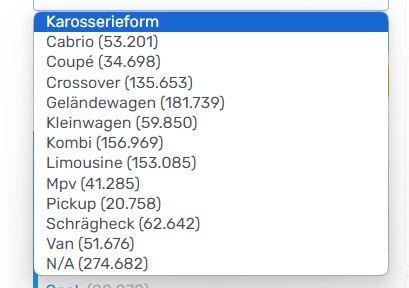


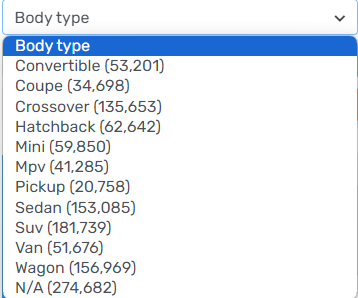

In [38]:
autos.loc[autos.vehicle_type == 'limousine', 'vehicle_type'] = 'sedan'
autos.loc[autos.vehicle_type == 'kleinwagen', 'vehicle_type'] = 'mini'
autos.loc[autos.vehicle_type == 'kombi', 'vehicle_type'] = 'wagon'
autos.loc[autos.vehicle_type == 'cabrio', 'vehicle_type'] = 'convertible'
autos.loc[autos.vehicle_type == 'andere', 'vehicle_type'] = 'other'

"suv" and "coupe" don't need to be translated as they're the same in English.
That leaves us with "bus". Let's look at some of the vehicles in that category:

In [39]:
autos.loc[autos.vehicle_type == 'bus', 'name']

0                         Peugeot_807_160_NAVTECH_ON_BOARD
5        Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...
9                Renault_Megane_Scenic_1.6e_RT_Klimaanlage
18                    Verkaufen_mein_bmw_e36_320_i_touring
23        Peugeot_Boxer_2_2_HDi_120_Ps_9_Sitzer_inkl_Klima
                               ...                        
49885                           Citroën_Xsara_Picasso_1.8i
49892                                           Vw_T_4_Bus
49963              Mercedes_Benz_B_200_CDI_Special_Edition
49970    c4_Grand_Picasso_mit_Automatik_Leder_Navi_Temp...
49972            Mercedes_Benz_Vito_115_CDI_Extralang_Aut.
Name: name, Length: 4024, dtype: object

The body type of these models is usually called "MPV" in English, so that's the name I'll use.

In [40]:
autos.loc[autos.vehicle_type == 'bus', 'vehicle_type'] = 'mpv'

Let's verify we don't have any German types left:

In [41]:
autos.loc[:, 'vehicle_type'].unique()

array(['mpv', 'sedan', 'mini', 'wagon', nan, 'coupe', 'suv',
       'convertible', 'other'], dtype=object)

Great. Next, gearbox:

In [42]:
autos.loc[:, 'gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

That's a straightforward translation:

In [43]:
autos.loc[autos.gearbox == 'manuell', 'gearbox'] = 'manual'
autos.loc[autos.gearbox == 'automatik', 'gearbox'] = 'automatic'

Let's verify:

In [44]:
autos.loc[:, 'gearbox'].unique()

array(['manual', 'automatic', nan], dtype=object)

Next we'll look at model. The models are all names, so there's no point in translating them to English, but we'll translate "andere" to "other".

In [45]:
autos.loc[autos.model == 'andere', 'model'] = 'other'

Now, fuel type:

In [46]:
autos.loc[:, 'fuel_type'].unique()

array(['lpg', 'benzin', 'diesel', nan, 'cng', 'hybrid', 'elektro',
       'andere'], dtype=object)

'lpg', 'cng', 'diesel' and 'hybrid' can stay as they are. the rest are trivial translations:

In [47]:
autos.loc[autos.fuel_type == 'benzin', 'fuel_type'] = 'petrol'
autos.loc[autos.fuel_type == 'elektro', 'fuel_type'] = 'electric'
autos.loc[autos.fuel_type == 'andere', 'fuel_type'] = 'other'

Let's verify:

In [48]:
autos.loc[:, 'fuel_type'].unique()

array(['lpg', 'petrol', 'diesel', nan, 'cng', 'hybrid', 'electric',
       'other'], dtype=object)

Good. Finally, unrepaired damage:

In [49]:
autos.loc[:, 'unrepaired_damage'].unique()

array(['nein', nan, 'ja'], dtype=object)

Again, the translation is trivial:

In [50]:
autos.loc[autos.unrepaired_damage == 'ja', 'unrepaired_damage'] = 'yes'
autos.loc[autos.unrepaired_damage == 'nein', 'unrepaired_damage'] = 'no'

Let's verify:

In [51]:
autos.loc[:, 'unrepaired_damage'].unique()

array(['no', nan, 'yes'], dtype=object)

Okay, the dataframe is entirely in English now.

## Analysis

### Price by Brand

It'd be interesting to see how the asking prices differ by brand, so let's explore that avenue.
First, let's check how many listings we have for each brand:

In [52]:
brands_by_listings = autos["brand"].value_counts()
print(brands_by_listings.sort_values(ascending=False).to_string())

volkswagen        9801
bmw               5108
opel              4971
mercedes_benz     4480
audi              4022
ford              3238
renault           2182
peugeot           1384
fiat              1187
seat               846
skoda              761
nissan             711
mazda              706
smart              658
citroen            651
toyota             593
hyundai            464
sonstige_autos     444
volvo              423
mini               408
mitsubishi         379
honda              365
kia                328
alfa_romeo         309
porsche            279
suzuki             275
chevrolet          263
chrysler           163
dacia              123
daihatsu           116
jeep               106
subaru              98
land_rover          98
saab                77
jaguar              71
daewoo              69
trabant             63
rover               62
lancia              49
lada                27


Volkswagen is definitely the most popular brand in the dataset, with almost 10,000 listings, which is about 20% of the total number of listings.

For the purposes of this project, we'll look only at brands that have more than 1,000 listings, to make sure our analysis has significance.

In [53]:
brand_mean_prices = {}
for brand in brands_by_listings[brands_by_listings > 1000].index:
    brand_mean_prices[brand] = autos[autos["brand"] == brand]["price"].mean()

In [54]:
sorted(brand_mean_prices.items(), key=lambda x:x[1], reverse=True)

[('audi', 9380.718547986076),
 ('mercedes_benz', 8672.654241071428),
 ('bmw', 8621.729052466719),
 ('volkswagen', 5639.900316294255),
 ('ford', 4086.93421865349),
 ('peugeot', 3113.860549132948),
 ('opel', 3005.4960772480385),
 ('fiat', 2836.8736310025274),
 ('renault', 2496.070577451879)]

The list above shows the mean asking prices for the 9 most popular car brands for sale in eBay Germany. It stands to reason that these are the most popular brands in Germany in general.
We can see that the brands fall into 2 distinct categories:

__Everyday brands__ - this is the largest category. It spans from Renault to Volkswagen on the list above, with mean asking prices of about \\$2,500-\\$5,500.

__Luxury cars__ - includes Audi, Mercedes Benz and BMW, with significantly higher mean asking prices (~\\$8,500-\\$9,500).

### Mileage by brand

Next, let's see if there's any visible linkage between the average kilometrage and asking price of each brand.

In [55]:
brand_mean_kilometrage = {}
for brand in brands_by_listings[brands_by_listings > 1000].index:
    brand_mean_kilometrage[brand] = autos[autos["brand"] == brand]["odometer_km"].mean() 

bmk_series = pd.Series(brand_mean_kilometrage)
bmp_series = pd.Series(brand_mean_prices)
df = pd.DataFrame(bmp_series, columns = ['mean_price'])
df["mean_kilometrage"] = bmk_series

In [56]:
df

,mean_price,mean_kilometrage
volkswagen,5639.900316,128804.203653
bmw,8621.729052,132698.707909
opel,3005.496077,129384.429692
mercedes_benz,8672.654241,131025.669643
audi,9380.718548,129245.400298
ford,4086.934219,124277.331686
renault,2496.070577,128281.393217
peugeot,3113.860549,127127.890173
fiat,2836.873631,116950.294861


The mean kilometrage for most of the top 9 brands is around 130,000km, without any visible linkage to the brand's mean price. Fiat seems to be an outlier, with less than 120,000km as its mean kilometrage.
The car's price seems to be unrelated to its kilometrage.

### Effect of kilometrage on a car's asking price

The odometer values are already in discrete values, which is probably how eBay lets sellers set their kilometrage. Let's see if there's a clear linkage between the number of kilometers a car has been driven and its asking price, regardless of brand:

In [93]:
mean_prices_by_km = {}
for distance in autos.loc[:, "odometer_km"].unique():
    mean_prices_by_km[distance] = autos.loc[autos.odometer_km == distance, "price"].mean()
series = pd.Series(mean_prices_by_km)

In [96]:
print("Odometer   Price")
series = series.sort_index()
series

Odometer   Price


5000      15243.830056
10000     21255.304721
20000     18523.200271
30000     16674.564069
40000     15518.952261
50000     15151.737639
60000     12406.989343
70000     10954.826014
80000      9743.110058
90000      8470.087321
100000     8188.223581
125000     6443.642075
150000     3900.144081
Name: Distance, dtype: float64

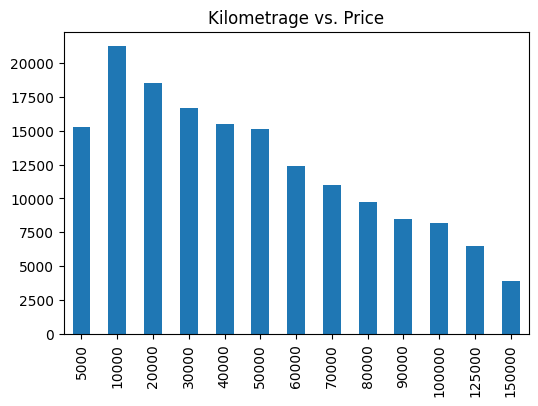

In [136]:
%matplotlib inline
plot = series.plot.bar(title="Kilometrage vs. Price")

It's quite clear from the bar plot that there's a strong linkage between a car's kilometrage and its asking price. Other than the outlier at 5,000 km, the more a car has been driven the more it's devalued. That is very much the expected result. 

### Effect of damage on a car's asking price

We'd like to see the effect of unrepaired damage on a car's value.
To do that we'll compare the mean price of damaged vs. undamaged cars.

In [57]:
damaged_mean_price = autos.loc[autos.unrepaired_damage == 'yes', 'price'].mean()
undamaged_mean_price = autos.loc[autos.unrepaired_damage != 'yes', 'price'].mean()


In [58]:
print(f"Mean price of damaged cars: {damaged_mean_price}")
print(f"Mean price of undamaged cars: {undamaged_mean_price}")

Mean price of damaged cars: 2492.1362926611646
Mean price of undamaged cars: 6621.81327761194


There's quite a significant (\\$4,129.67) price difference between damaged and non-damaged cars, but that doesn't necessarily mean that the difference is entirely due to the damage. 

It could be that owners of older cars tend not to fix damages, or that owners of cheaper cars don't want to spend money on fixing them. To investigate that connection we'd need to compare damaged and undamaged cars of similar models and identical or adjacent years, and see if there's still a price difference.

## Conclusion

In this project we have taken our first steps with Pandas.
We have read a dataset into a DataFrame and cleaned it by:
* standardising column names
* removing useless information
* removing invalid information
* cleaning date data and converting it into uniform numeric data
* converting most German words and terms to English

We then ran some analyses.
* We found that cars in the 9 most popular brands fall into one of two categories - Luxury Cars or Everyday Brands - judging by the brand's mean asking price
* We found no obvious linkage between a brand's mean asking price and its mean kilometrage
* We did find a strong linkage between a car's kilometrage and its asking price, as can be expected
* We found that cars with unrepaired damage are offered for significantly less than undamaged cars, but this discrepancy can be caused by several other factors, and should not be taken as is

finally, suggestions for additional analyses to do on the dataset:
* check for linkage between the car's gearbox, vehicle type or engine type and its asking price
* check for the most popular model for each brand
* check which brands/models/vehicle types are most likely to sell quickly